# Patient 2

## Constituent Functions

Term | Roi | FunctionType | DoseLevel | PercentVolume | EudParameterA | Weight
-|-|-|-|-|-|-
0 | PTV | MinDose | 6270 | 0 | N/A | 1
1 | PTV | MaxDose | 7550 | 0 | N/A |1
2 | Lungs | MaxDvh | 2000 | 35 | N/A | 1
3 | SpinalCord | MaxDose | 5000 | 0 | N/A | 1
4 | Esophagus | MaxDose | 6930 | 0 | N/A | 1
5 | Heart | MaxEud | 3500 | N/A | 1 | 1


## Clinical Goals

Roi | Type | GoalCriteria | AcceptanceLevel | ParameterValue 
-|-|-|-|-
PTV | MinDvh | AtLeast | 0.99 | 6270
PTV | MaxDose | AtMost | 7550 | 0
Lungs | MaxDvh | AtMost | 2000 | 0.35
SpinalCord | MaxDose | AtMost | 5000 | 0
Esophagus | MaxDose | AtMost | 6930 | 0
Heart | AverageDose | AtMost | 3500 | 0

## Normalization

Treatment plans are normalized to a PTV D99 of 6720 cGy.

In [1]:
from importlib import reload
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../../src')
import plots

# Full Range

In [2]:
# Load results
funcs_full = pd.read_csv('funcs_full.csv')
goals = pd.read_csv('goals.csv')
pars_full = pd.read_pickle('pars_full.npy')
results_full = pd.read_pickle('results_full.npy')

# Filter by flag
pars_full0 = plots.filter_flag(pars_full, results_full, 0, keep=True)
pars_full1 = plots.filter_flag(pars_full, results_full, 0, keep=False)

Percent good plans: 57.03


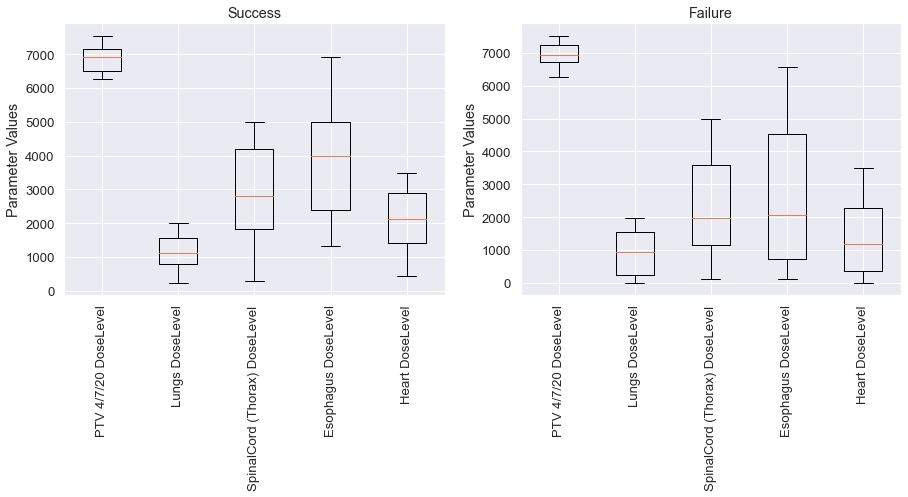

In [3]:
# Constituent function parameter values
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plots.boxplot(funcs_full, pars_full0, 'pars', 'Success', ax[0])
plots.boxplot(funcs_full, pars_full1, 'pars', 'Failure', ax[1])
print(f"Percent good plans: {100*sum(results_full['Flag'] == 0)/pars_full['Sample'].nunique():.2f}")

# Looks like the esophagus parameter can't be too low

Lowest PTV Max Dose Found: 8461.48 cGy


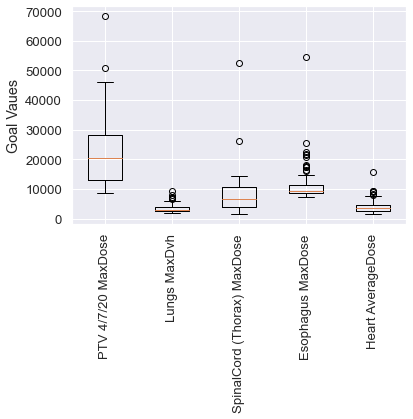

In [4]:
# Clinical goal results
plots.boxplot(goals[1:], results_full, 'goals')
print(f'Lowest PTV Max Dose Found: {min(results_full[1]):.2f} cGy')

# None of the plans were able to satisfy the PTV Max goal.

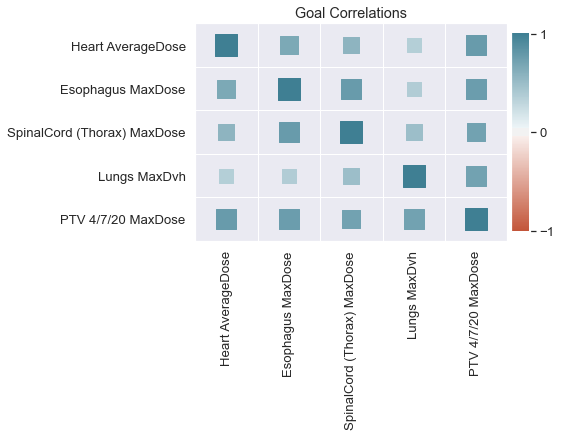

In [5]:
# Goal correlations
plots.corrplot(goals[1:], results_full, title='Goal Correlations')

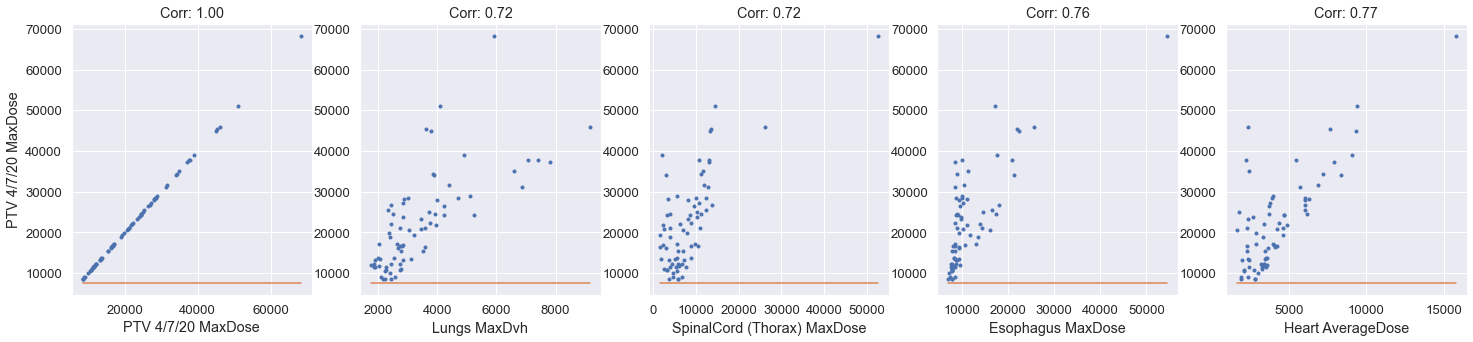

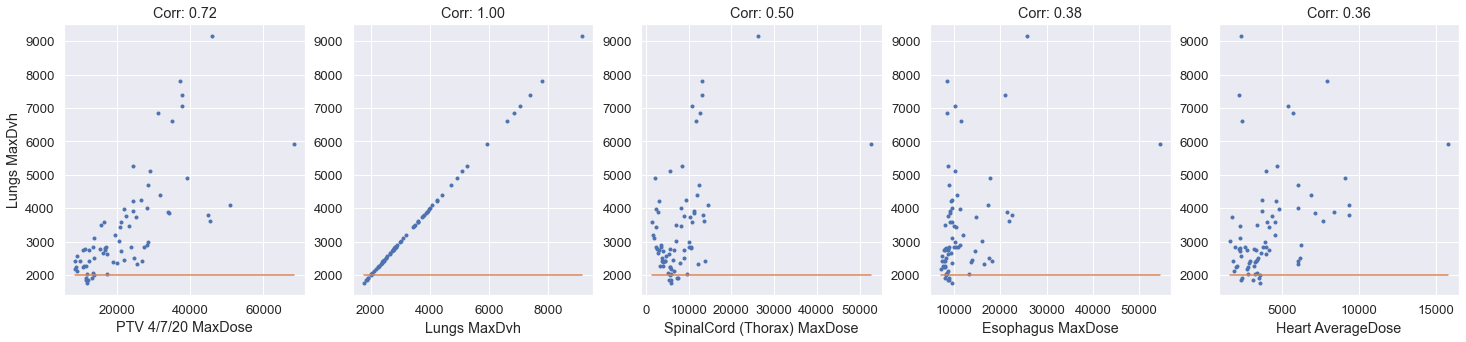

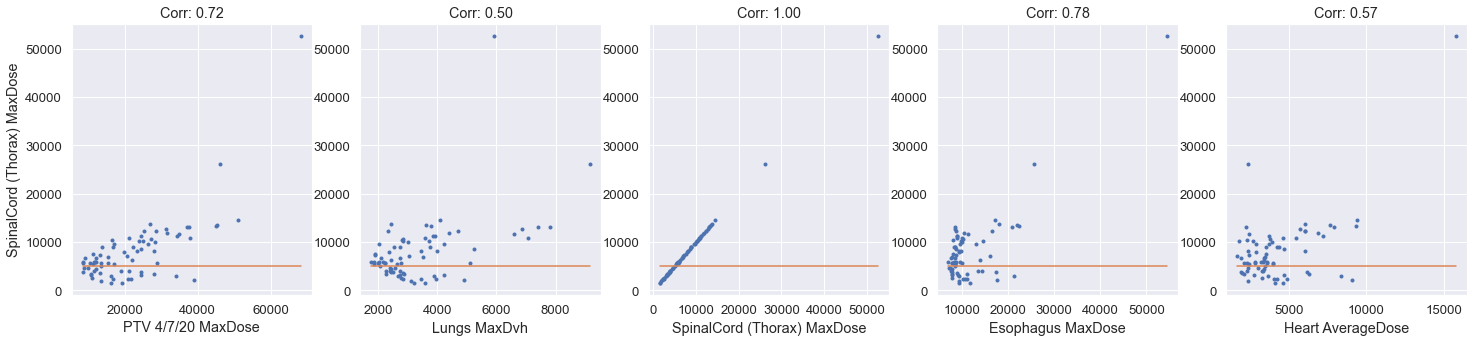

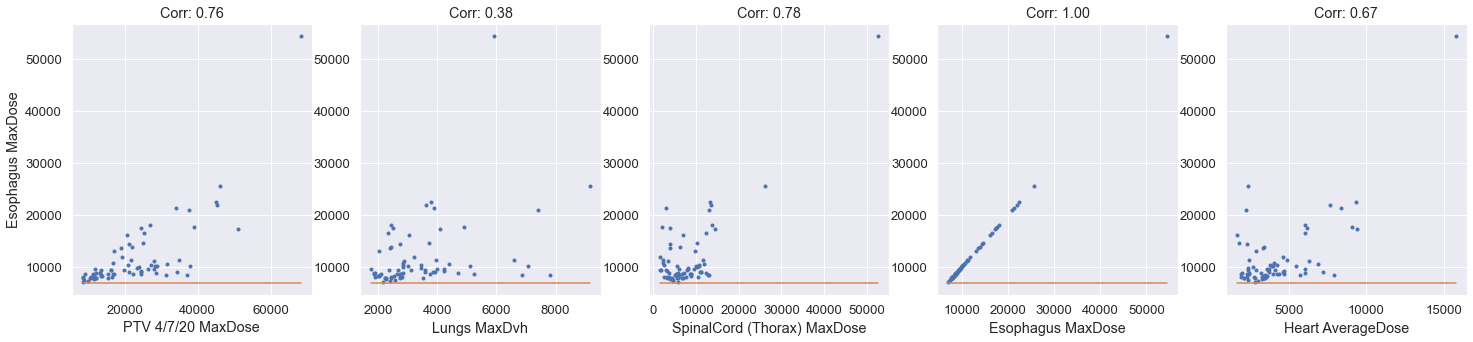

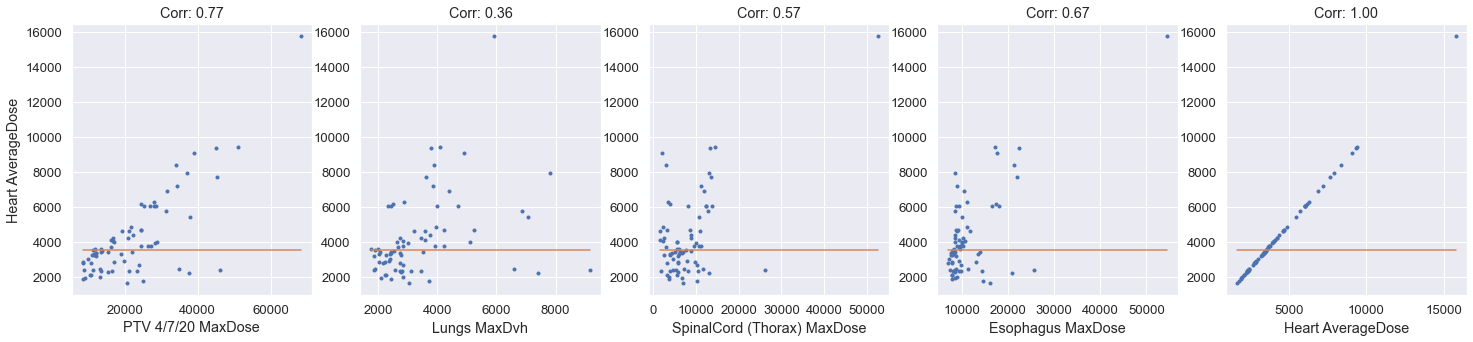

In [6]:
# Goal scatterplots
plots.scatterplot(goals[1:], results_full)

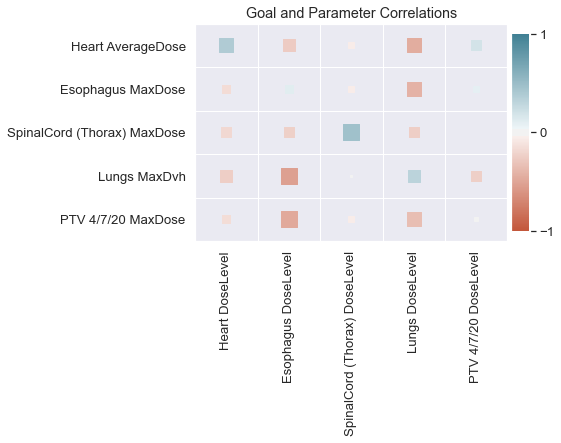

In [7]:
# Goal and parameters correlation
plots.corrplot(goals[1:], results_full, funcs_full, pars_full0, 'Goal and Parameter Correlations')

# Looks like lowering parameters causes most goals to increase :( 
# There's not a lot of room for improvement in this case with these objectives
# Esophagus and lungs really affect the PTV max

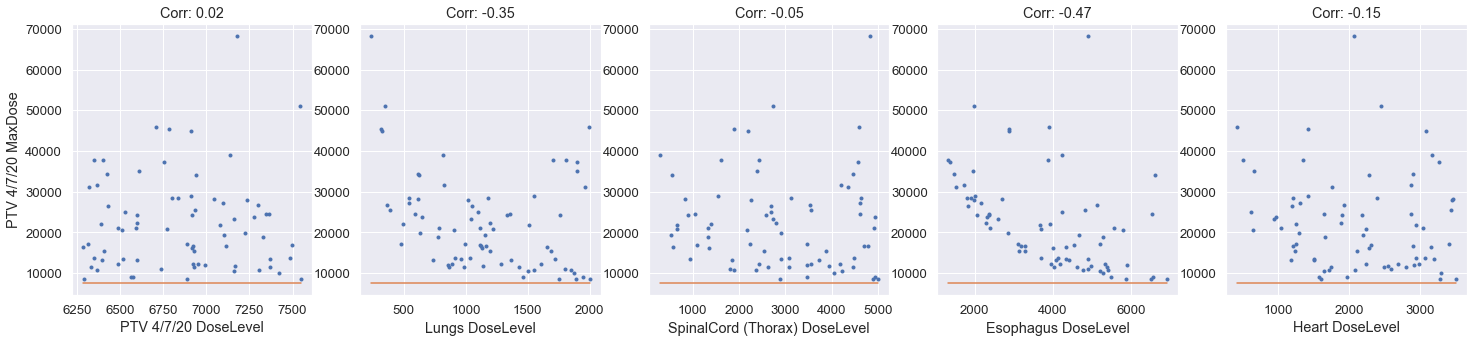

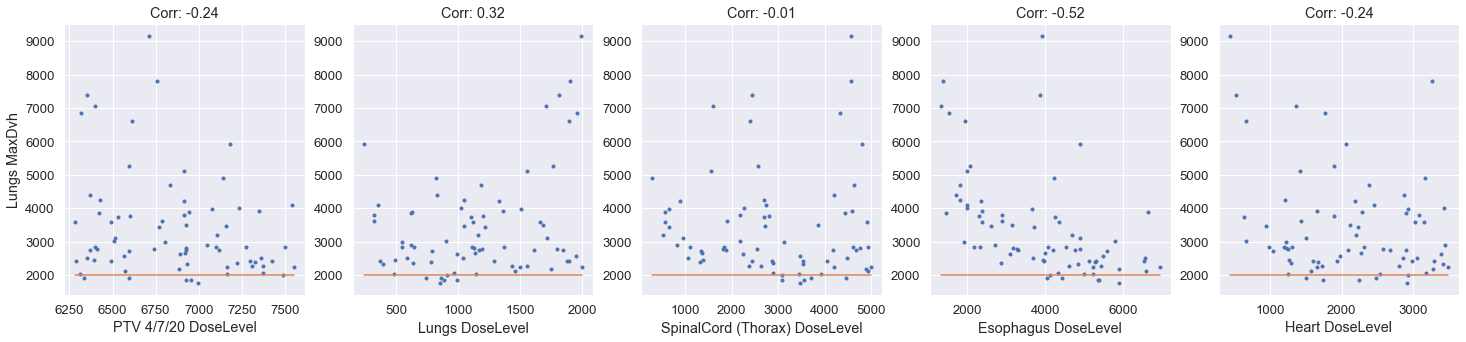

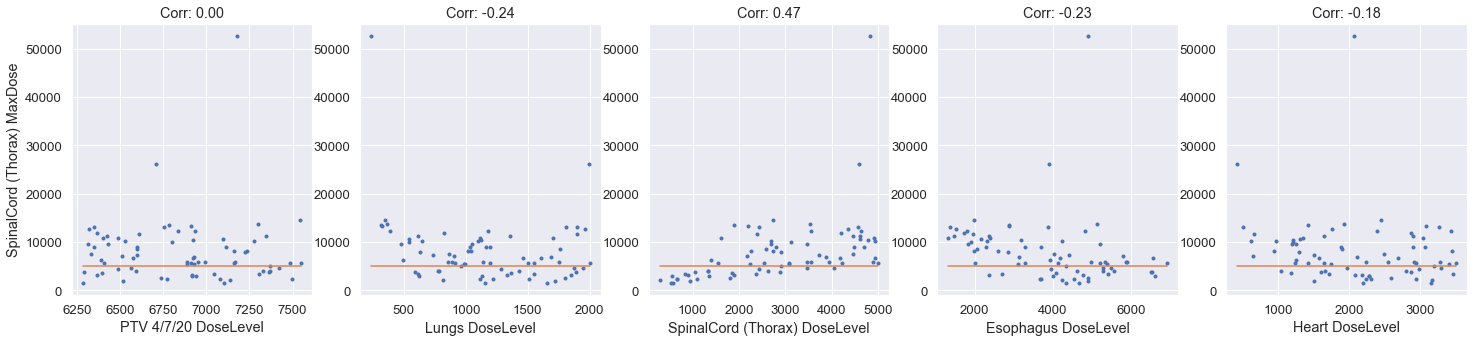

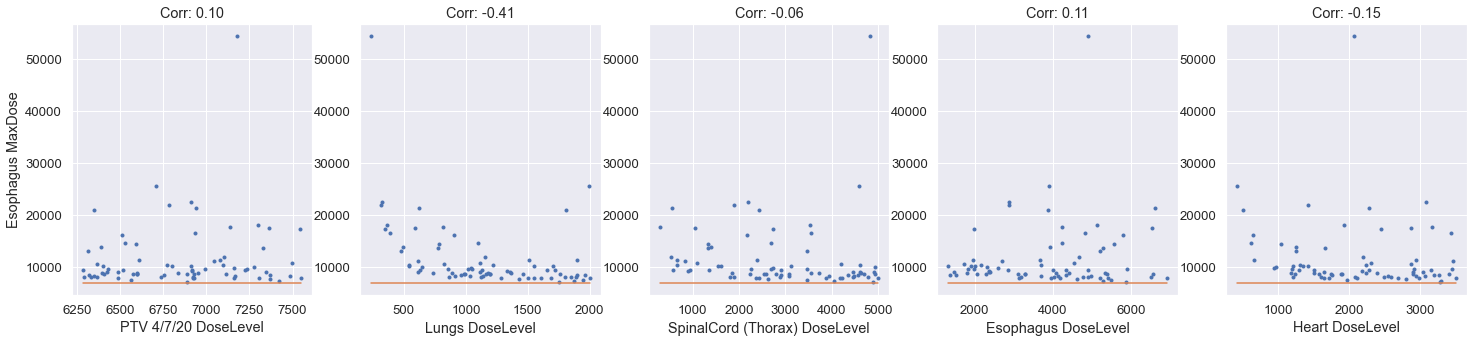

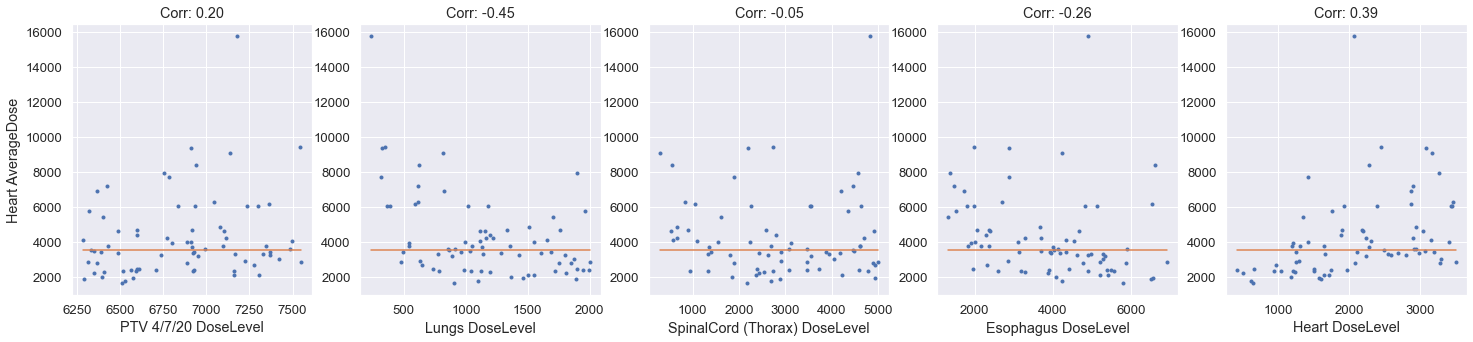

In [8]:
# Goal and parameter scatterplots
plots.scatterplot(goals[1:], results_full, funcs_full, pars_full0)

# Half Range

In [9]:
# Load data
funcs_half = pd.read_csv('funcs_half.csv')
goals = pd.read_csv('goals.csv')
pars_half = pd.read_pickle('pars_half.npy')
results_half = pd.read_pickle('results_half.npy')

Percent good plans: 100.0


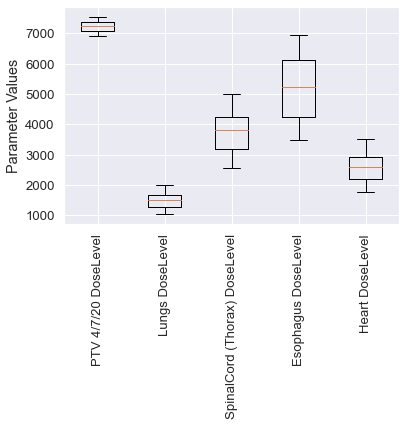

In [10]:
# Constituent function parameters
plots.boxplot(funcs_half, pars_half, 'pars')
print(f"Percent good plans: {100*sum(results_half['Flag'] == 0)/len(results_half)}")

Lowest PTV Max Dose Found: 8489.64 cGy


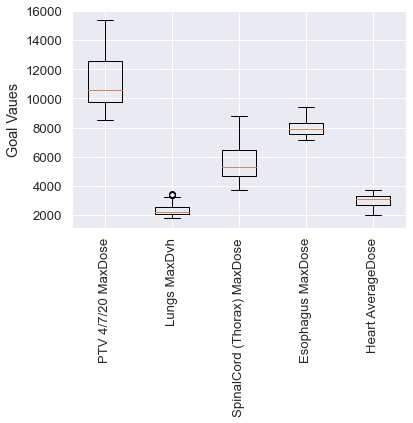

In [11]:
# Clinical goal results
plots.boxplot(goals[1:], results_half, 'goals')
print(f'Lowest PTV Max Dose Found: {min(results_half[1]):.2f} cGy')

# Again none of the plans were able to satisfy the PTV Max goal.

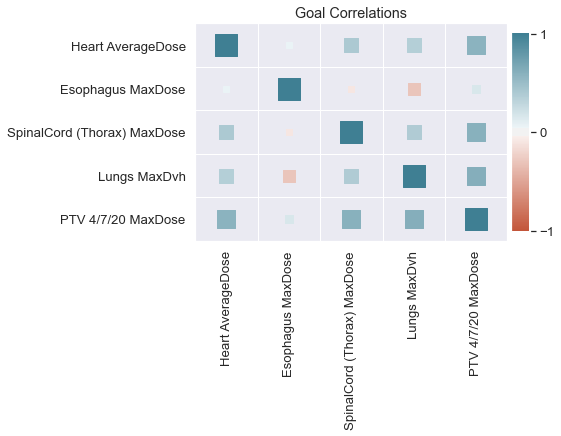

In [12]:
# Goal correlations
plots.corrplot(goals[1:], results_half, title='Goal Correlations')

# Esophagus and Lungs compete

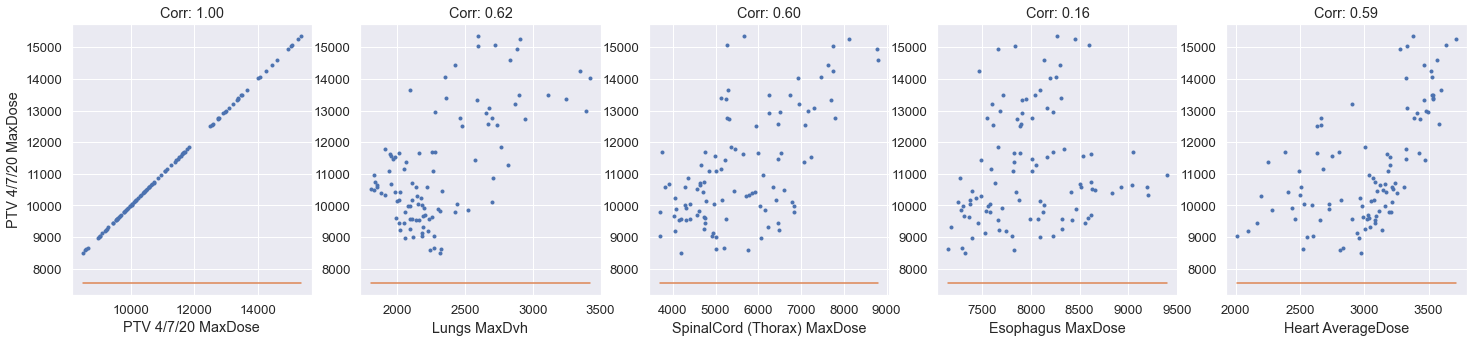

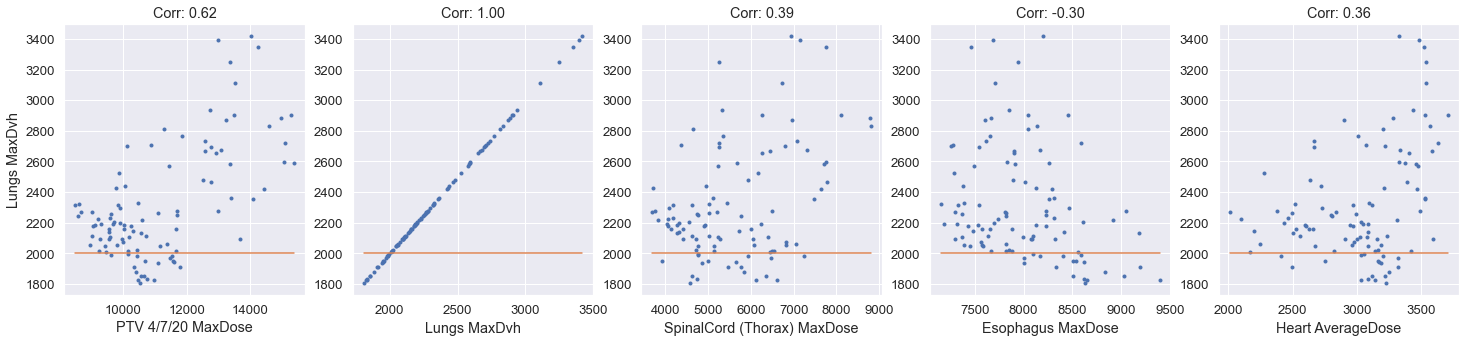

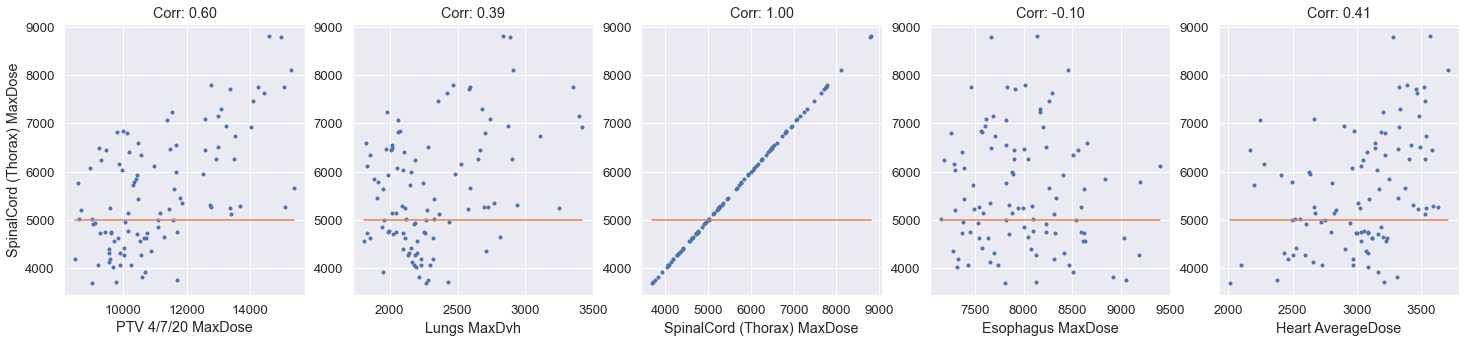

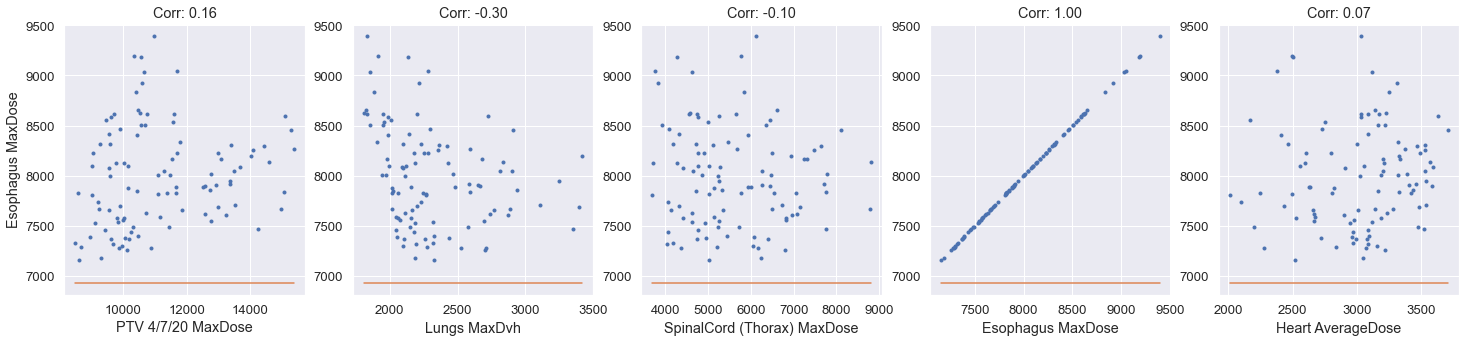

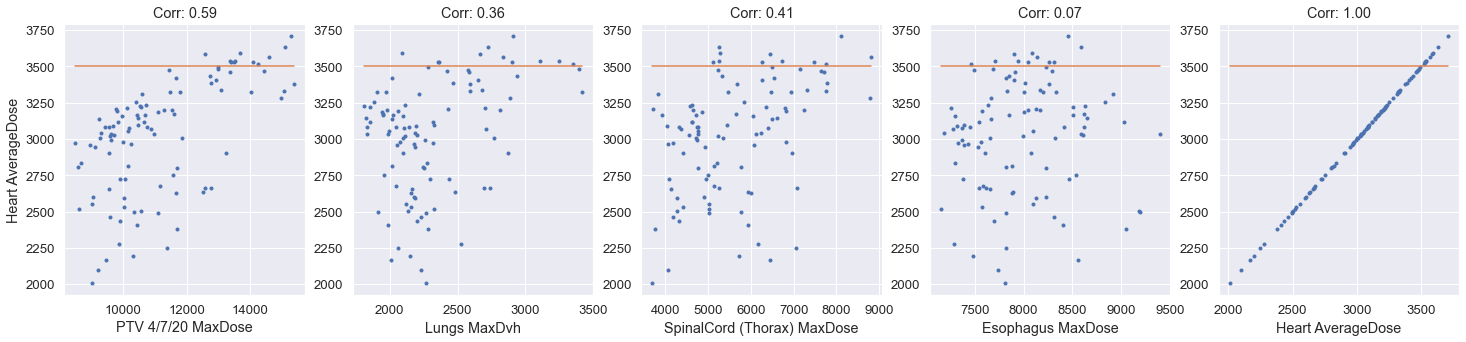

In [13]:
# Goal scatterplots
plots.scatterplot(goals[1:], results_half)

# Looks like none of the plans met the esophagus goal either

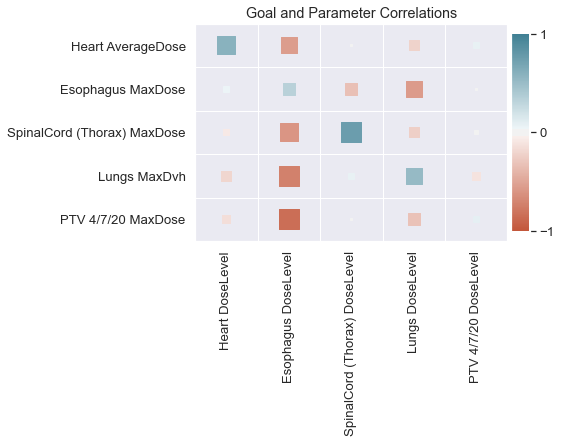

In [14]:
# Goal and parameter correlations
plots.corrplot(goals[1:], results_half, funcs_half, pars_half, 'Goal and Parameter Correlations')

# Similar patterns to before

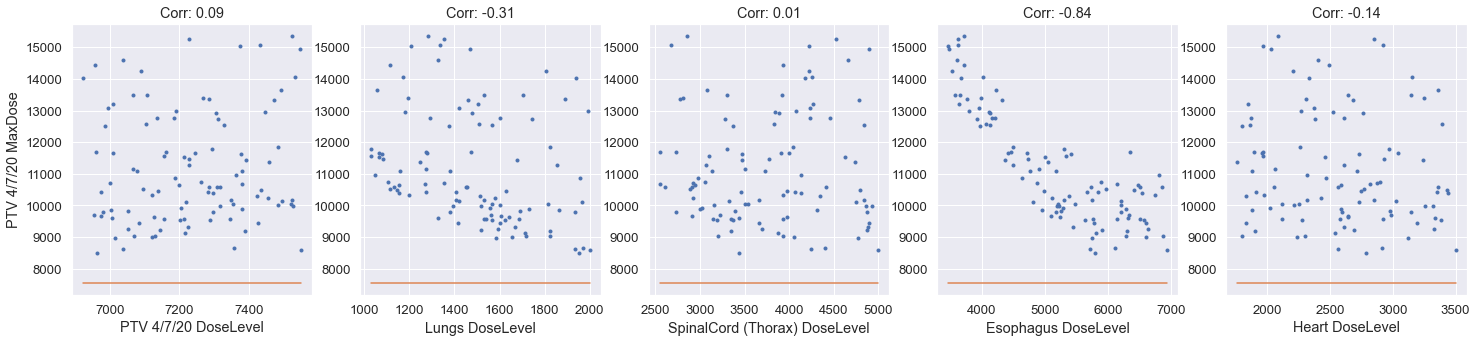

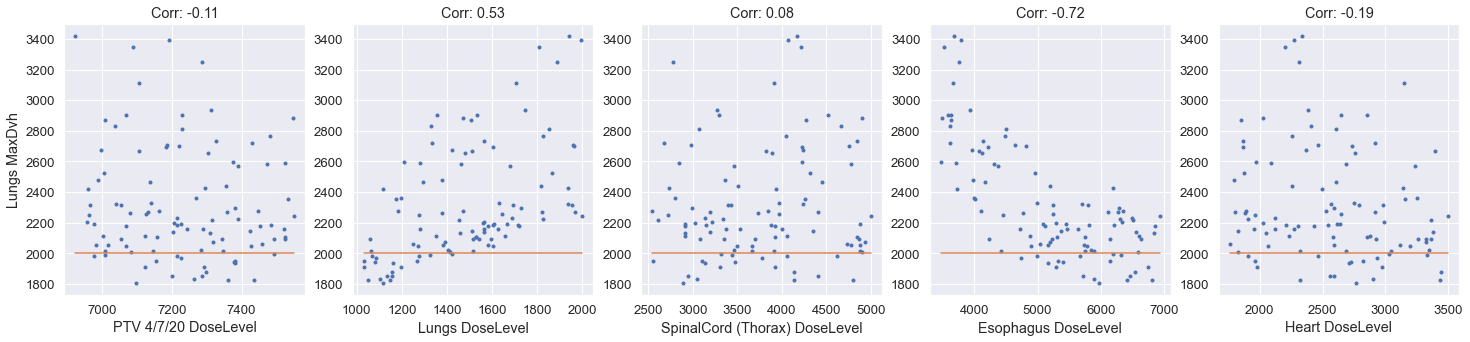

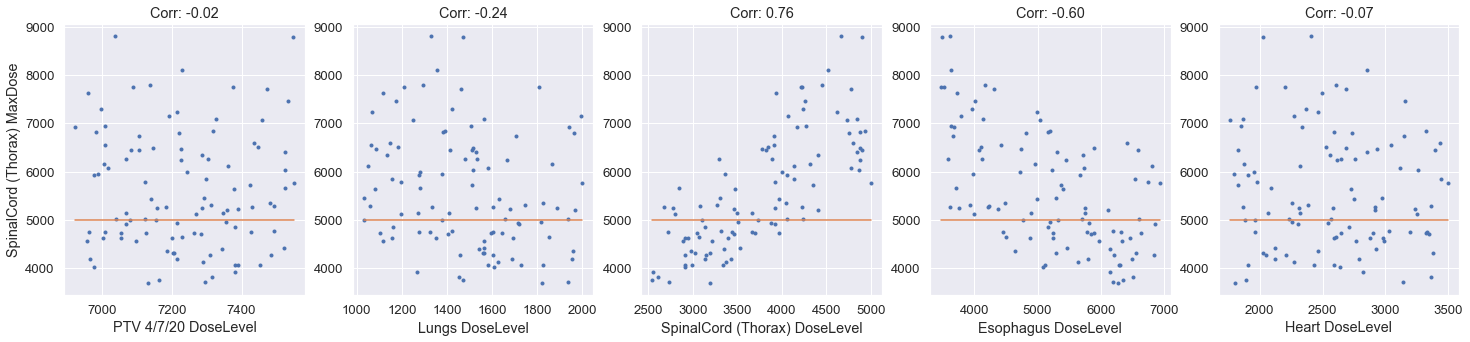

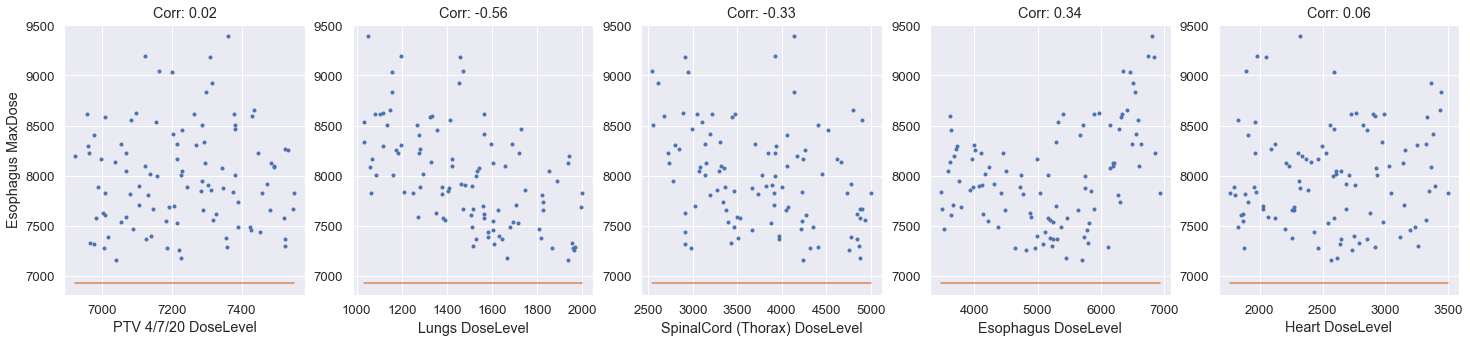

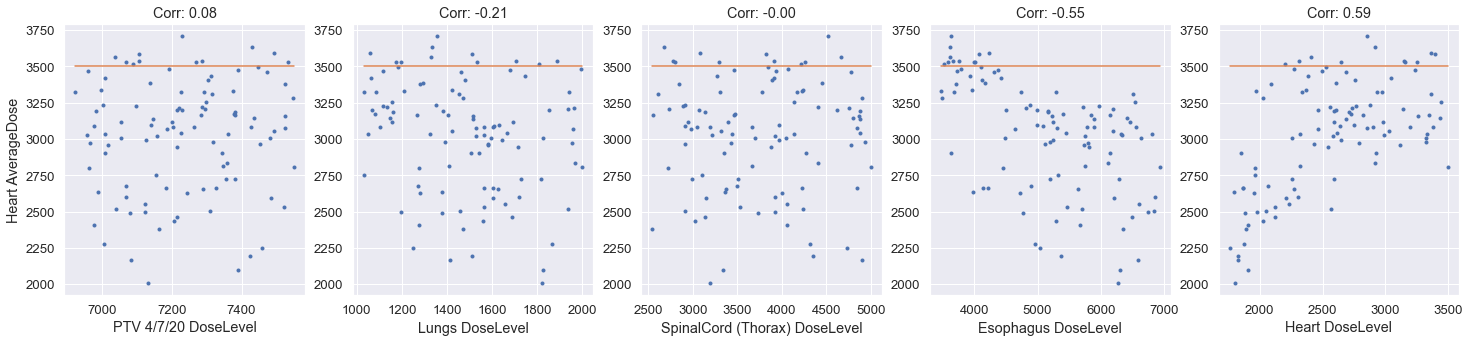

In [15]:
# Goal and parameter scatterplots
plots.scatterplot(goals[1:], results_half, funcs_half, pars_half)